# Image Data Augmentation

Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.

Training deep learning neural network models on more data can result in more skillful models, and the augmentation techniques can create variations of the images that can improve the ability of the fit models to generalize what they have learned to new images.

The Keras deep learning neural network library provides the capability to fit models using image data augmentation via the ImageDataGenerator class.



#  1. Image Data Augmentation

Data augmentation is a technique to artificially create new training data from existing training data.

Image data augmentation is perhaps the most well-known type of data augmentation and involves creating transformed versions of images in the training dataset that belong to the same class as the original image.

Transforms include a range of operations from the field of image manipulation, such as shifts, flips, zooms, and much more.

The intent is to expand the training dataset with new, plausible examples. This means, variations of the training set images that are likely to be seen by the model. For example, a horizontal flip of a picture of a cat may make sense, because the photo could have been taken from the left or right. A vertical flip of the photo of a cat does not make sense and would probably not be appropriate given that the model is very unlikely to see a photo of an upside down cat.

Image data augmentation is typically only applied to the training dataset, and not to the validation or test dataset. This is different from data preparation such as image resizing and pixel scaling; they must be performed consistently across all datasets that interact with the model.

# 2. Image Augmentation With ImageDataGenerator

The Keras deep learning library provides the ability to use data augmentation automatically when training a model.

A range of techniques are supported, as well as pixel scaling methods. We will focus on five main types of data augmentation techniques for image data; specifically:

1. Image shifts via the width_shift_range and height_shift_range arguments.
2. Image flips via the horizontal_flip and vertical_flip arguments.
3. Image rotations via the rotation_range argument
4. Image brightness via the brightness_range argument.
5. Image zoom via the zoom_range argument.

In [1]:
# Image Data Augmentation

# Create Data Generator

"datagenerator=ImageDataGenerator()"

# Once constructed, an iterator can be created for an image dataset.
#The iterator will return one batch of augmented images for each iteration.
# An iterator can be created from an image dataset loaded in memory via the flow() function.

"it = datagen.flow(X, y)"

# Alternately, an iterator can be created for an image dataset located on disk in a specified directory, 
#where images in that directory are organized into subdirectories according to their class.

"it = datagen.flow_from_directory(X, y, ...)"

# Once the iterator is created, it can be used to train a neural network model by calling the fit_generator() function.

# steps_per_epoch argument must specify the number of batches of samples comprising one epoch.
# if your original dataset has 10,000 images and your batch size is 32, then a reasonable value ceil(10,000/32), or 313 batches.

"model.fit_generator(it, steps_per_epoch=313, ...)"

'model.fit_generator(it, steps_per_epoch=313, ...)'

# Horizontal and Vertical Shift Augmentation

A shift to an image means moving all pixels of the image in one direction, such as horizontally or vertically, while keeping the image dimensions the same.

This means that some of the pixels will be clipped off the image and there will be a region of the image where new pixel values will have to be specified.

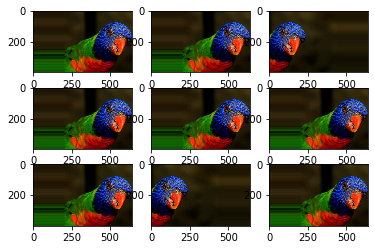

In [15]:
# Example of horizontal shift image augmentation..

# Load the image
from keras.preprocessing.image import load_img
img=load_img('bird.jpg')

# Convert image to array
from keras.preprocessing.image import img_to_array
data=img_to_array(img)

# expand numpy array dimension to one more extra sample
from numpy import expand_dims
samples=expand_dims(data,0)

# create image data augmentation generator 
from keras.preprocessing.image import ImageDataGenerator
# ou can specify a tuple or array of the min and max range from which the shift will be sampled [-100, 100] or [-0.5, 0.5].
datagen=ImageDataGenerator(width_shift_range=[-200,200])

# Prepare iteration 
it=datagen.flow(samples,batch_size=1)

# generate sample and plot 
from matplotlib import pyplot as plt
for i in range(9):
    # define subplot 
    plt.subplot(330+1+i)
    # generate batch of images
    batch=it.next()
    # converting to unsigned  integration to viewing
    image=batch[0].astype('uint8')
    # plot raw pixel data 
    plt.imshow(image)
plt.show()

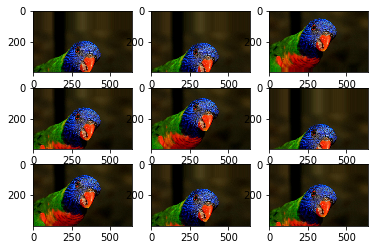

In [22]:
# Vertical shift image augmentation

# load an image
from keras.preprocessing.image import load_img
image=load_img('bird.jpg')

# converting the image to array of image
from keras.preprocessing.image import img_to_array
data=img_to_array(image)

# expanding the array image dimension addition of one sample
from numpy import expand_dims
expanded_data=expand_dims(data,0)

# Create the Data Image Augmentation
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(height_shift_range=0.5)

# prepare iteration
it=datagen.flow(expanded_data)

# iteration to plot single image in 9 different height ways
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(330+ 1 + i)
    batch=it.next()
    image=batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

# Horizontal And Vertical Flip Augmentation

An image flip means reversing the rows or columns of pixels in the case of a vertical or horizontal flip respectively.

The flip augmentation is specified by a boolean horizontal_flip or vertical_flip argument to the ImageDataGenerator class constructor.

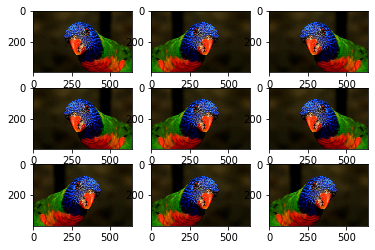

In [24]:
# Example for horizontal flip augmentation..

#load image
from keras.preprocessing.image import load_img
image=load_img('bird.jpg')

# Convert image to array
from keras.preprocessing.image import img_to_array
array_data=img_to_array(image)

# Expanding numpy array 2D dimensions to addition of one sample to make 3D
from numpy import expand_dims
expand_data=expand_dims(array_data,0)

# Create the Image Data generator
datagen=ImageDataGenerator(horizontal_flip=True)

# Init the iteration flow
it=datagen.flow(expand_data)

import matplotlib.pyplot as plt
# iteration for 9 horizontal flip images
for i in range(9):
    plt.subplot(330+1+i)
    batch=it.next()
    flip=batch[0].astype('uint8')
    plt.imshow(flip)
plt.show()

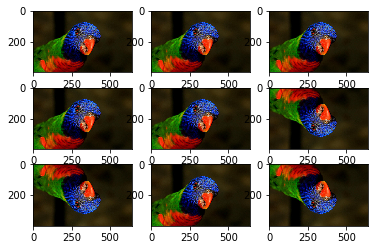

In [26]:
# Example for vertical flip augmentation

# Load image
from keras.preprocessing.image import load_img
image=load_img('bird.jpg')

# Converting the image to array
from keras.preprocessing.image import img_to_array
array_data=img_to_array(image)

# Expanding the numpy array 2D dimensions addition of one sample to 3D
from numpy import expand_dims
expand_data=expand_dims(array_data,0)

# Create the object for Image Data Generator
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(vertical_flip=True)

# preparing iteration
it=datagen.flow(expand_data)

# iteration for 9 to flip a single image
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(330+1+i)
    batch=it.next()
    image=batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

# Random Rotation Augmentation

A rotation augmentation randomly rotates the image clockwise by a given number of degrees from 0 to 360.

The rotation will likely rotate pixels out of the image frame and leave areas of the frame with no pixel data that must be filled in. rotation_range

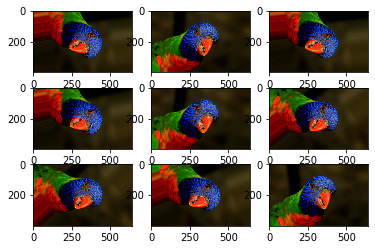

In [27]:
# Example for random rotation 90 augmentation

# Load image
from keras.preprocessing.image import load_img
image=load_img('bird.jpg')

# Convert image to array
from keras.preprocessing.image import img_to_array
array_data=img_to_array(image)

# Expanding 2D array addition of one sample dimension 3D
from numpy import expand_dims
sample_data=expand_dims(array_data,0)

# create image data generator
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rotation_range=90)

# iteration flow
it=datagen.flow(sample_data)

#iteration
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(330+1+i)
    batch=it.next()
    image=batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

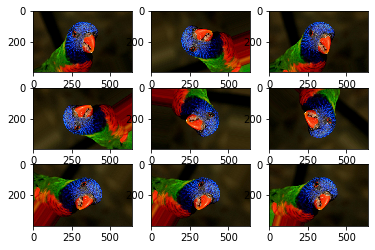

In [28]:
# Example for random rotation 180 augmentation

# Load image
from keras.preprocessing.image import load_img
image=load_img('bird.jpg')

# Convert image to array
from keras.preprocessing.image import img_to_array
array_data=img_to_array(image)

# Expanding 2D array addition of one sample dimension 3D
from numpy import expand_dims
sample_data=expand_dims(array_data,0)

# create image data generator
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rotation_range=180)

# iteration flow
it=datagen.flow(sample_data)

#iteration
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(330+1+i)
    batch=it.next()
    image=batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

# Random Brightness Augmentation

The brightness of the image can be augmented by either randomly darkening images, brightening images, or both.

This can be achieved by specifying the brightness_range argument to the ImageDataGenerator() constructor that specifies min and max range as a float representing a percentage for selecting a brightening amount.

Values less than 1.0 darken the image, e.g. [0.5, 1.0], whereas values larger than 1.0 brighten the image, e.g. [1.0, 1.5], where 1.0 has no effect on brightness.

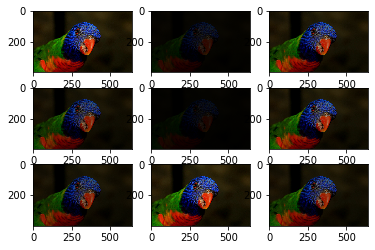

In [29]:
# Example for Random brightness augmentation..

# Load image
from keras.preprocessing.image import load_img
image=load_img('bird.jpg')

# convert image to array of image
from keras.preprocessing.image import img_to_array
data=img_to_array(image)

# expanding the array of image from 2D to 3D with empty sample
from numpy import expand_dims
sample=expand_dims(data,0)

# create image data augmentation generator
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(brightness_range=[0.1,1.0])

# iteration flow
it=datagen.flow(sample)

# iteration
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(330+1+i)
    batch=it.next()
    image=batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

# Random Zoom Augmentation

A zoom augmentation randomly zooms the image in and either adds new pixel values around the image or interpolates pixel values respectively.

Image zooming can be configured by the zoom_range argument.

If a float is specified, then the range for the zoom will be [1-value, 1+value]. For example, if you specify 0.3, then the range will be [0.7, 1.3].

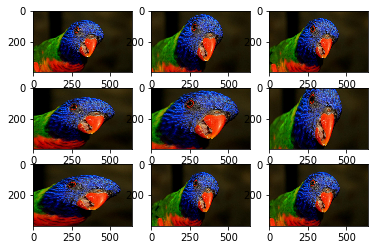

In [30]:
# Example for random zoom augmentation

# Load image
from keras.preprocessing.image import load_img
image=load_img('bird.jpg')

# Converting the image to array of image
from keras.preprocessing.image import img_to_array
data=img_to_array(image)

# Expanding  array of image from 2D to 3D by adding exmpty sample
from numpy import expand_dims
sample=expand_dims(data,0)

# Create image data augmentation generator
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(zoom_range=[0.4,1.0])

# Iteration flow
it=datagen.flow(sample)

# iteration
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(330+1+i)
    batch=it.next()
    image=batch[0].astype('uint8')
    plt.imshow(image)
plt.show()